In [1]:
print('helloML')

helloML


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
housing = pd.read_csv('housing.data',delim_whitespace=True,header=-1)
housing.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV' ]

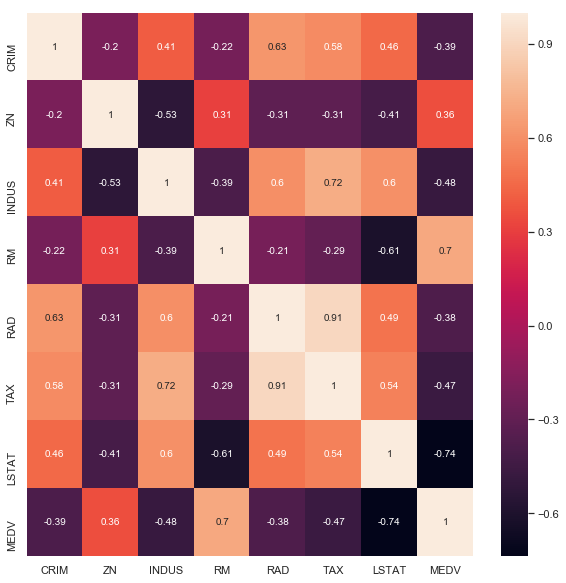

In [3]:
plt.figure(figsize=(10,10))
sns.heatmap(housing[['CRIM','ZN','INDUS','RM','RAD','TAX','LSTAT','MEDV' ]].corr(),annot=True)
plt.show()

# Linear Reg

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
##select model
##model.fit(reshaped(x),Yasfunction(x))
##use y_pridit = model.predict(reshaped(linspace(x_fit_values)))

In [296]:
x = housing['RM'].values.reshape(-1,1)

In [298]:
y = housing['MEDV'].values

In [299]:
lrModel = LinearRegression()
lrModel.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

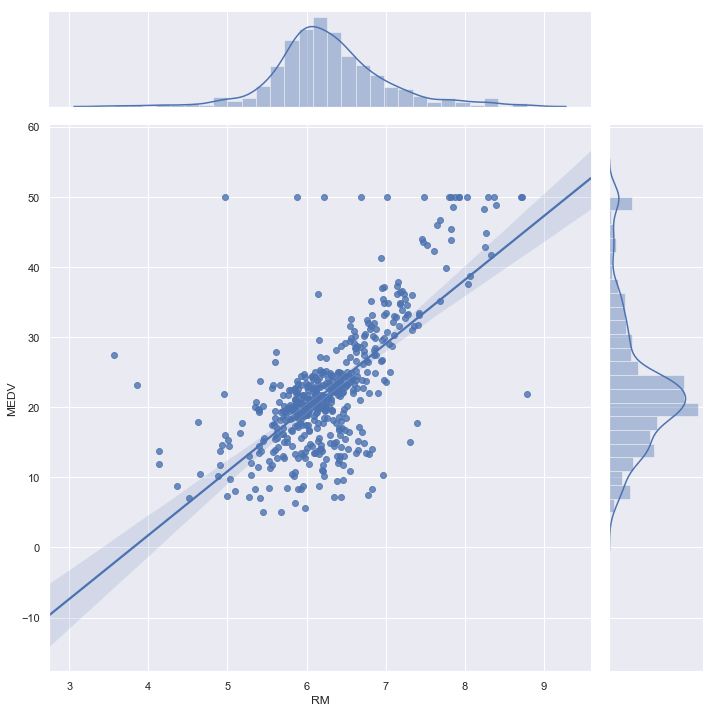

In [9]:
sns.jointplot(x='RM',y='MEDV',data=housing,kind ='reg',height=10)
plt.show()

..............................................
#  Robust Reg

In [10]:
from sklearn.linear_model import RANSACRegressor
x = housing['LSTAT'].values.reshape(-1,1)

In [11]:
ranModel = RANSACRegressor()

In [12]:
ranModel.fit(x,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [13]:
inMask = ranModel.inlier_mask_
outMask = ~inMask ##np.logical_not(inMask)

In [14]:
lineX = np.arange(3,50,3)
lineY = ranModel.predict(lineX.reshape(-1,1))

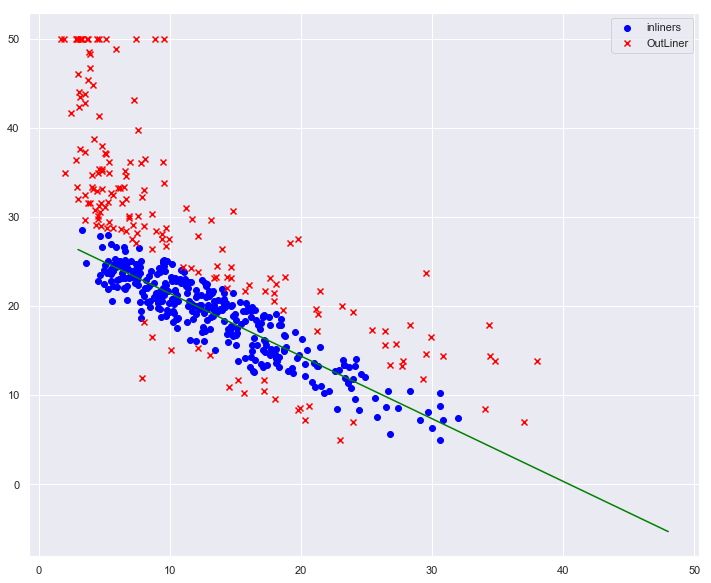

In [15]:
plt.figure(figsize=(12,10));
plt.scatter(x[inMask],y[inMask],c='blue',marker = 'o',label = 'inliners')
plt.scatter(x[outMask],y[outMask],c='red',marker = 'x',label = 'OutLiner')
plt.plot(lineX,lineY,color='green')
plt.legend(loc = 'upper right')
plt.show()

In [16]:
print('y = ',ranModel.estimator_.coef_,'x + ',ranModel.estimator_.intercept_)

y =  [-0.70367529] x +  28.438989918377267


....................................
# performance eval of reg model

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = housing.iloc[:,:-1].values
y = housing['MEDV'].values
xTrain, xTest , yTrain, yTest =  train_test_split(x,y,test_size=0.2 ,random_state =0)

In [19]:
lrModel = LinearRegression()
lrModel.fit(xTrain,yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
yTrainPredict = lrModel.predict(xTrain)
yTestPredict = lrModel.predict(xTest)

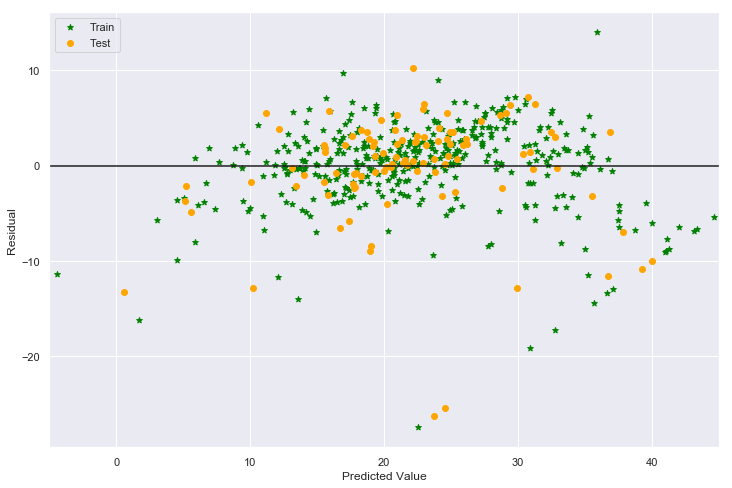

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(yTrainPredict,yTrainPredict-yTrain,color='green',marker='*',label='Train')
plt.scatter(yTestPredict,yTestPredict-yTest,color='orange', marker='o',label='Test')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.legend(loc = 'upper left')
plt.hlines(y=0,xmin=-5,xmax=45)
plt.xlim([-5,45])
plt.show()

### MSE

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
print('MSE_Train : ',mean_squared_error(yTrain,yTrainPredict),' MSE_Test: ',mean_squared_error(yTest,yTestPredict))

MSE_Train :  19.326470203585725  MSE_Test:  33.448979997676474


### R2


In [24]:
from sklearn.metrics import r2_score

In [25]:
print('R2_Train : ',r2_score(yTrain,yTrainPredict),' R2_Test: ',r2_score(yTest,yTestPredict))

R2_Train :  0.7730135569264234  R2_Test:  0.5892223849182514


...................................................

# Near Perfect Model

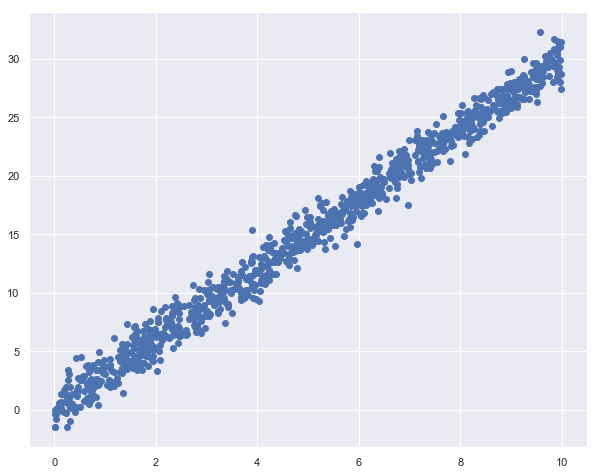

In [26]:
x = 10*np.random.rand(1000)
y = 3*x + np.random.randn(1000)
plt.figure(figsize = (10,8))

plt.scatter(x,y);
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xTrain, xTest , yTrain, yTest =  train_test_split(x.reshape(-1,1),y,test_size=0.3 ,random_state =0)

In [29]:
lrModel = LinearRegression()
lrModel.fit(xTrain,yTrain)
yTrainPredict = lrModel.predict(xTrain)
yTestPredict = lrModel.predict(xTest)

### residual analysis of npm

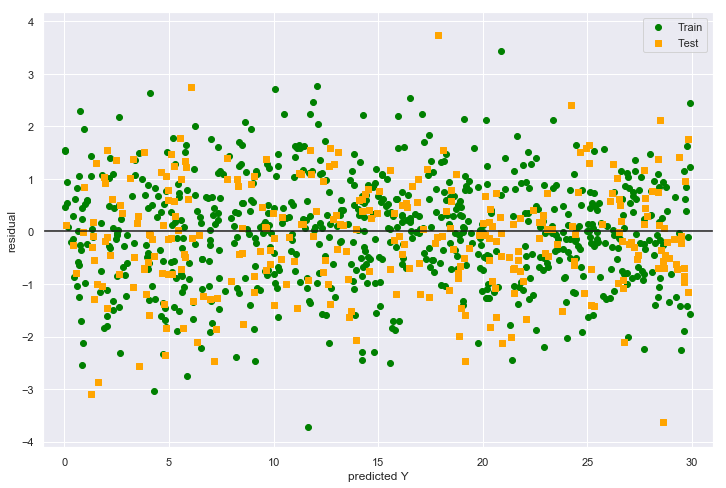

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(yTrainPredict,yTrainPredict-yTrain, color='green', marker='o' , label = 'Train')
plt.scatter(yTestPredict,yTestPredict-yTest, color='orange',marker='s', label = 'Test')
plt.hlines(y=0,xmin = -1,xmax=31)
plt.xlim(-1,31)
plt.xlabel('predicted Y')
plt.legend(loc = 'upper right')
plt.ylabel('residual')
plt.show()

### MSE

In [31]:
from sklearn.metrics import mean_squared_error
print('MSE_Train : ',mean_squared_error(yTrain,yTrainPredict),' MSE_Test: ',mean_squared_error(yTest,yTestPredict))

MSE_Train :  1.0544083168236298  MSE_Test:  1.064851188525609


### R2

In [32]:
from sklearn.metrics import r2_score
print('R2_Train : ',r2_score(yTrain,yTrainPredict),' R2_Test: ',r2_score(yTest,yTestPredict))

R2_Train :  0.9855421674583699  R2_Test:  0.9866847619248684


   .......................................................
   # Multiple Reg  

In [33]:
from sklearn.datasets import load_boston
bostonData = load_boston()
x = pd.DataFrame(bostonData.data , columns = bostonData.feature_names)
y = bostonData.target ##MEDV

In [34]:
##statsmodel

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [36]:
xConst = sm.add_constant(x) ##adding bias

C:\Users\q\Anaconda3\envs\iris_2\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [37]:
model = sm.OLS(y,xConst) ##odinary least sq

In [38]:
lrModel = model.fit();
lrModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          6.72e-135
Time:                        20:02:37   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
lrForm = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM',data = x)

In [40]:
mlr = lrForm.fit()
#mlr.summary()

.........................
## Corr

In [41]:
pd.options.display.float_format = '{:,.4f}'.format
corrMatrix = housing.corr()
corrMatrix[np.abs(corrMatrix) < 0.5] = 0

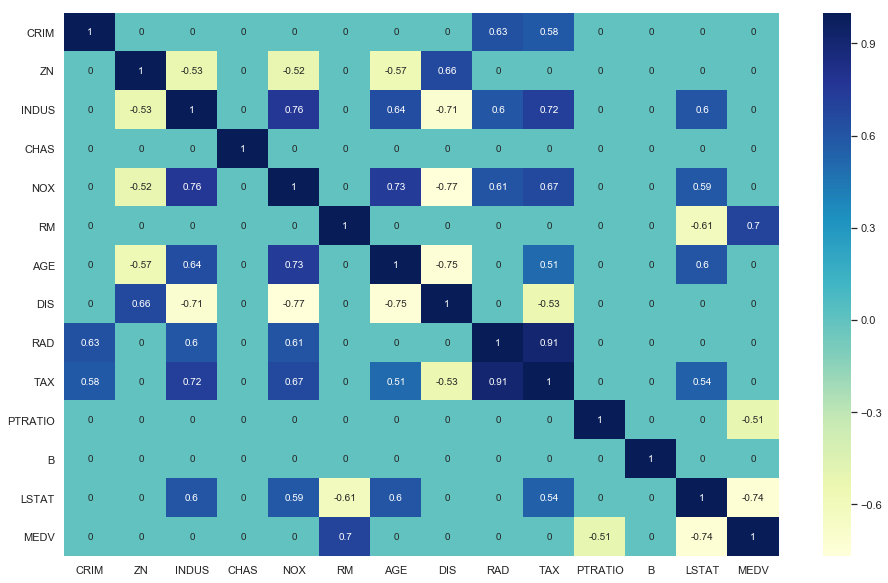

In [42]:
plt.figure(figsize=(16,10))
sns.heatmap(corrMatrix,annot=True,cmap = 'YlGnBu')
plt.show()

In [43]:
eigenValue, eigenVector = np.linalg.eig(housing.corr())

In [44]:
pd.Series(eigenValue).sort_values()

8    0.0603
9    0.1340
12   0.1830
13   0.2128
11   0.2523
10   0.2773
7    0.4031
6    0.5354
5    0.6600
4    0.8509
3    0.8865
2    1.3489
1    1.6495
0    6.5460
dtype: float64

In [45]:
abs(pd.Series(eigenVector[:,8])).sort_values(ascending=False)

9    0.6988
8    0.6350
2    0.2355
13   0.1341
1    0.0963
4    0.0876
12   0.0831
0    0.0591
10   0.0557
7    0.0471
6    0.0382
3    0.0235
11   0.0162
5    0.0072
dtype: float64

In [46]:
print(housing.columns[2],housing.columns[8],housing.columns[9],housing.columns[13])

INDUS RAD TAX MEDV


### standardise variable to identify key features

In [47]:
from sklearn.linear_model import LinearRegression
lrModel = LinearRegression();
lrModel.fit(x,y) ##x,y from mulreg 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
result = pd.DataFrame(list(zip(lrModel.coef_,housing.columns)),columns=['coefficient','name']).set_index('name')
np.abs(result).sort_values(by='coefficient',ascending=False)

,coefficient
name,
NOX,17.7666
RM,3.8099
CHAS,2.6867
DIS,1.4756
PTRATIO,0.9527
LSTAT,0.5248
RAD,0.3060
CRIM,0.1080
ZN,0.0464


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar= StandardScaler();
Stand_coef_linear_reg = make_pipeline(scalar,lrModel)

In [50]:
Stand_coef_linear_reg.fit(x,y)
result = pd.DataFrame(list(zip(Stand_coef_linear_reg.steps[1][1].coef_,housing.columns)),columns=['coefficient','name']).set_index('name')
np.abs(result).sort_values(by='coefficient',ascending=False)

,coefficient
name,
LSTAT,3.7436
DIS,3.1040
RM,2.6742
RAD,2.6622
TAX,2.0768
PTRATIO,2.0606
NOX,2.0567
ZN,1.0816
CRIM,0.9281


## R<sup>2</sup>

In [51]:
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [52]:
lrForm = smf.ols(formula = 'y ~ DIS + LSTAT + RM + RAD + TAX + PTRATIO + NOX + ZN + CRIM + B + CHAS + INDUS + AGE',data = x)
benchMark = lrForm.fit()
r2_score(y,benchMark.predict(housing))

0.7406426641094095

In [53]:
#without LSTAT
lrForm = smf.ols(formula = 'y ~ DIS + RM + RAD + TAX + PTRATIO + NOX + ZN + CRIM + B + CHAS + INDUS + AGE',data = x)
benchMark = lrForm.fit()
r2_score(y,benchMark.predict(housing))s

SyntaxError: invalid syntax (<ipython-input-53-37de1d082732>, line 4)

In [ ]:
#without NOX
lrForm = smf.ols(formula = 'y ~ DIS + RM + RAD + TAX + PTRATIO + LSTAT + ZN + CRIM + B + CHAS + INDUS + AGE',data = x)
benchMark = lrForm.fit()
r2_score(y,benchMark.predict(housing))

In [ ]:
#without AGE
lrForm = smf.ols(formula = 'y ~ DIS + RM + RAD + TAX + PTRATIO + NOX + ZN + CRIM + B + CHAS + INDUS + LSTAT',data = x)
benchMark = lrForm.fit()
r2_score(y,benchMark.predict(housing))

...........................................
# Gradient Descent Minimization

In [84]:
from sklearn.datasets import load_boston
bostonData = load_boston()
bostonDF = pd.DataFrame(bostonData.data , columns = bostonData.feature_names)
x = bostonDF[['RM']].values
y = bostonData.target ##MEDV


In [85]:
from sklearn.preprocessing import StandardScaler
scX= StandardScaler();
scY= StandardScaler();
stdX = scX.fit_transform(x);
stdY = scX.fit_transform(y.reshape(-1,1)).flatten()
#stdY = scX.fit_transform(y.reshape(-1,1)).resize(1,-1)
#[stdY] = stdY

stdX.mean:  -1.0882818581305882e-16  #near zero
std.stdDev:  0.9999999999999999  #near one
x.mean:  6.284634387351779   x.stdDev:  0.7019225143345689


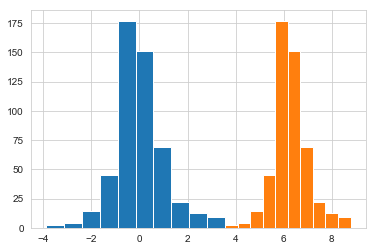

In [89]:
plt.hist(stdX)
plt.hist(x)
plt.plot()
print('stdX.mean: ',stdX.mean(),' #near zero')
print('std.stdDev: ',stdX.std(),' #near one')
print('x.mean: ',x.mean(),'  x.stdDev: ',x.std())

In [33]:
alpha = 0.0001
w = np.zeros(1 + stdX.shape[1])
cost = []
n = 100
for i in range(n):
    predY = np.dot(stdX,w[1:])+w[0]
    error = predY - stdY
    w[1:] = w[1:] + alpha*stdX.T.dot(error)
    w[0] = w[0] + alpha*error.sum()
    cost.append(((error**2).sum()/2.0)) 

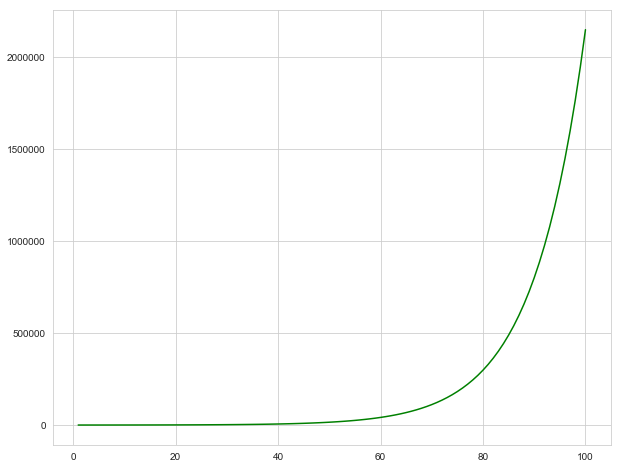

In [34]:
plt.figure(figsize=(10,8))
plt.plot(range(1,n+1),cost, color ='green')
plt.show()

..............................................
# Regularised Method for Reg

In [35]:
from sklearn.linear_model import LinearRegression

Coeff Estimate:  [0.47134857]


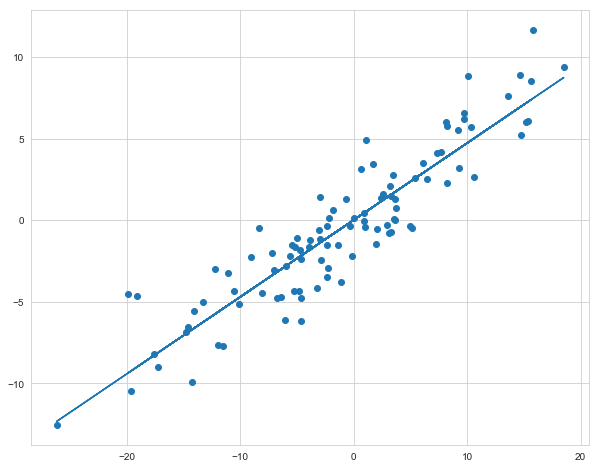

In [36]:
np.random.seed(42)
n  = 100
lrModel = LinearRegression()
x = np.random.randn(n)*10
y = 0.5*x + np.random.randn(n)*2
lrModel.fit(x.reshape(-1,1),y)
yPred = lrModel.predict(x.reshape(-1,1))
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x,yPred)
print('Coeff Estimate: ', lrModel.coef_)
plt.show()

In [37]:
idx = x.argmax()
y[idx] = 200

Coeff Estimate:  [0.92796845]


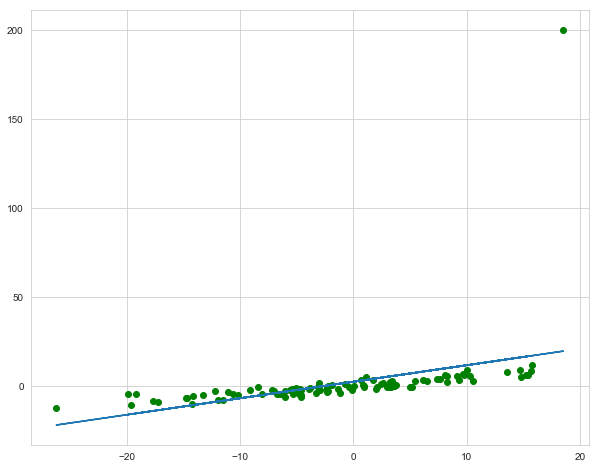

In [38]:
#o->outliner
oLrModel = LinearRegression(normalize = True)
oLrModel.fit(x.reshape(-1,1),y)
oYPred = oLrModel.predict(x.reshape(-1,1))
plt.figure(figsize=(10,8))
plt.scatter(x,y,color='green')
plt.plot(x,oYPred)
print('Coeff Estimate: ', oLrModel.coef_)
plt.show()

### Ridge reg

In [39]:
from sklearn.linear_model import Ridge

Coeff Estimate:  [0.46398423]


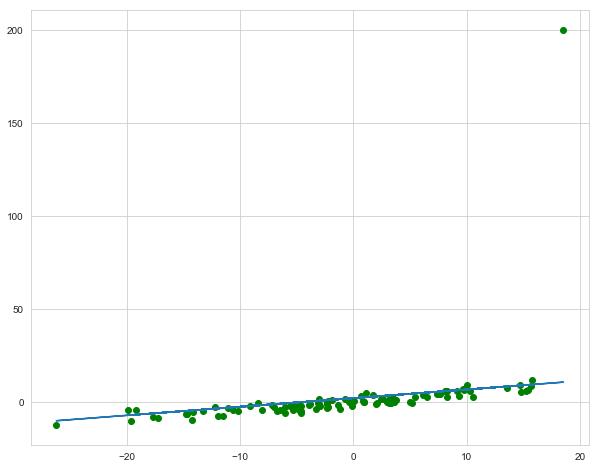

In [40]:
rigModel = Ridge(alpha=1,normalize = True)
rigModel.fit(x.reshape(-1,1),y)
rigYPred = rigModel.predict(x.reshape(-1,1))
plt.figure(figsize=(10,8))
plt.scatter(x,y,color='green')
plt.plot(x,rigYPred)
print('Coeff Estimate: ', rigModel.coef_)
plt.show()

### Lasso reg

In [41]:
from sklearn.linear_model import Lasso

Coeff Estimate:  [0.48530263]


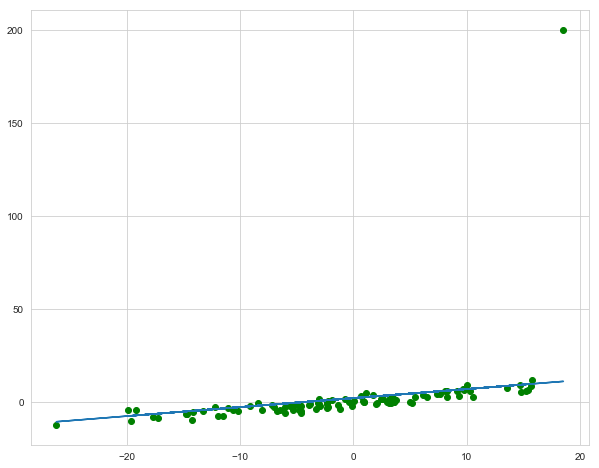

In [42]:
lasModel = Lasso(alpha=0.4,normalize = True)
lasModel.fit(x.reshape(-1,1),y)
lasYPred = lasModel.predict(x.reshape(-1,1))
plt.figure(figsize=(10,8))
plt.scatter(x,y,color='green')
plt.plot(x,lasYPred)
print('Coeff Estimate: ', lasModel.coef_)
plt.show()

### Elastic Net reg


In [43]:
from sklearn.linear_model import ElasticNet

Coeff Estimate:  [0.49988944]


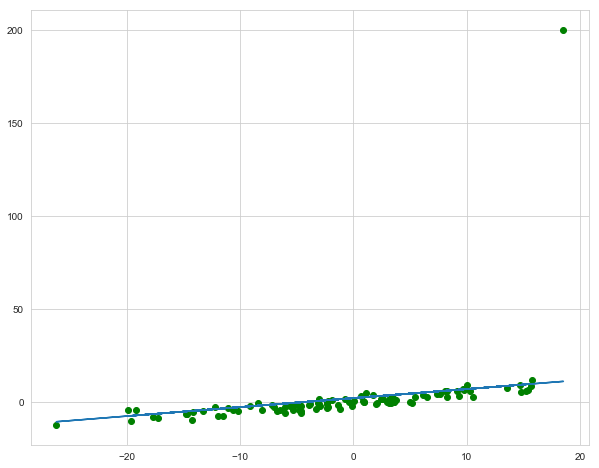

In [44]:
enModel = ElasticNet(alpha=0.016756,normalize = True)
enModel.fit(x.reshape(-1,1),y)
enYPred = enModel.predict(x.reshape(-1,1))
plt.figure(figsize=(10,8))
plt.scatter(x,y,color='green')
plt.plot(x,lasYPred)
print('Coeff Estimate: ', enModel.coef_)
plt.show()

.........................................................
# Polynomial Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

R2:  0.5917149670934201


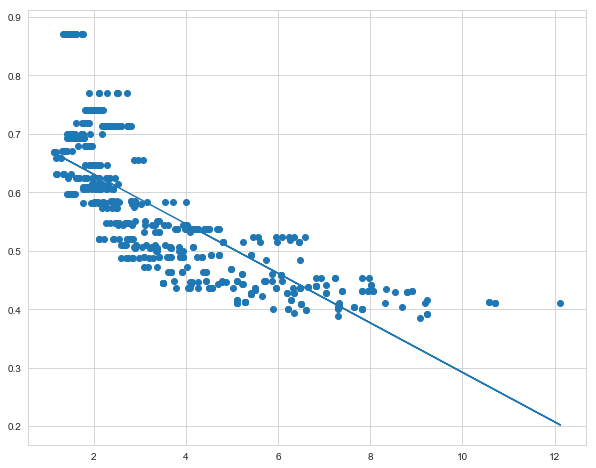

In [46]:
x = housing['DIS'].values
y = housing['NOX'].values

#linear Model
lrModel = LinearRegression()
lrModel.fit(x.reshape(-1,1),y)
yPred = lrModel.predict(x.reshape(-1,1))
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x,yPred)
print('R2: ', r2_score(y,yPred))
plt.show()

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
polyModel = PolynomialFeatures(degree = 2)
polyX = polyModel.fit_transform(x.reshape(-1,1))
newX = np.arange(x.min(),x.max(),1)

R2:  0.6998562064647851


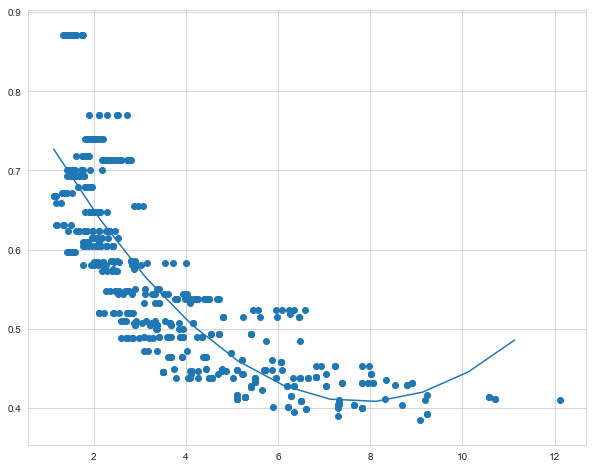

In [49]:
polyLrModel = LinearRegression()
polyLrModel.fit(polyX,y)
yPred = polyLrModel.predict(polyModel.fit_transform(newX.reshape(-1,1)))
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(newX,yPred)
print('R2: ', r2_score(y,polyLrModel.predict(polyX)))
plt.show()

........................................
# NonLinear Relationships

### tree

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
x = housing[['LSTAT']].values #not linear
y = housing['MEDV'].values

In [52]:
tree = DecisionTreeRegressor(max_depth=3)

In [53]:
tree.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [54]:
sort_idx = x.flatten().argsort()

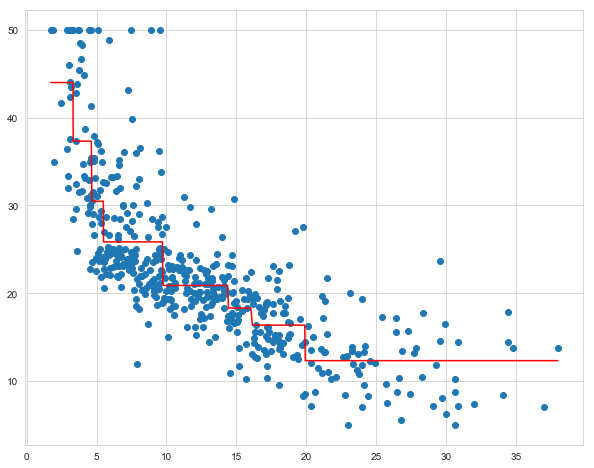

In [55]:
plt.figure(figsize=(10,8))
plt.scatter(x[sort_idx],y[sort_idx])
plt.plot(x[sort_idx],tree.predict(x[sort_idx]),color='red')
plt.show()

### Random Forest

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
x = housing.values
y = housing['MEDV'].values

In [58]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.3,random_state=42)

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
forestModel = RandomForestRegressor(n_estimators=500 , criterion='mse', random_state=42, n_jobs=-1)

In [61]:
forestModel.fit(xTrain,yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [62]:
yTrainPredict = forestModel.predict(xTrain)
yTestPredict = forestModel.predict(xTest)

In [63]:
print('MSE_Train: ', mean_squared_error(yTrain,yTrainPredict),'and R2_Train: ', r2_score(yTrain,yTrainPredict))
print('MSE_Test: ', mean_squared_error(yTest,yTestPredict),'and R2_Test: ', r2_score(yTest,yTestPredict))

MSE_Train:  0.009046378757059787 and R2_Train:  0.9998970792269342
MSE_Test:  0.02272966684210234 and R2_Test:  0.9996949574209891


### AdaBoost

In [64]:
from sklearn.ensemble import AdaBoostRegressor

In [65]:
adaModel = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=500 , random_state=42)

In [66]:
adaModel.fit(xTrain,yTrain)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=500,
         random_state=42)

In [67]:
yTrainPredict = adaModel.predict(xTrain)
yTestPredict = adaModel.predict(xTest)

In [68]:
print('MSE_Train: ', mean_squared_error(yTrain,yTrainPredict),'and R2_Train: ', r2_score(yTrain,yTrainPredict))
print('MSE_Test: ', mean_squared_error(yTest,yTestPredict),'and R2_Test: ', r2_score(yTest,yTestPredict))

MSE_Train:  0.03638993913538197 and R2_Train:  0.9995859911719138
MSE_Test:  0.06066357166233815 and R2_Test:  0.9991858669781464


................................................
# Data Pre-Processing

In [90]:
from sklearn import preprocessing

In [91]:
from sklearn.datasets import load_boston
bostonData = load_boston()
bostonDF = pd.DataFrame(bostonData.data,columns = bostonData.feature_names)

In [92]:
x = bostonDF[['LSTAT']].values
y = bostonData.target

In [93]:
alpha = 0.0001
w = np.zeros(1 + x.shape[1])
cost = []
n = 100
for i in range(n):
    predY = np.dot(x,w[1:])+w[0]
    error = predY - y
    w[1:] = w[1:] + alpha*x.T.dot(error)
    w[0] = w[0] + alpha*error.sum()
    cost.append(((error**2).sum()/2.0)) 

In [101]:
xTrain = np.array([[ 1,-1, 2],
                   [ 2, 0, 0],
                   [ 0, 1,-1]])
xTrain.mean(axis=0)

array([1.        , 0.        , 0.33333333])

### standardization / mean removal / varriance scaling
    mean = 0 , var = 1

In [106]:
xScaled = preprocessing.scale(xTrain)
print(xScaled,'\n')
print('mean: ',xScaled.mean(axis=0))
print('var: ',xScaled.var())

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]] 

mean:  [0. 0. 0.]
var:  1.0


C:\Users\q\Anaconda3\envs\iris_2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


### MinMaxScaler

In [129]:
minMaxScaler = preprocessing.MinMaxScaler()

In [130]:
xMM = minMaxScaler.fit_transform(xTrain)
xMM

C:\Users\q\Anaconda3\envs\iris_2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [139]:
xTest = np.array([-5,1,4])
minMaxScaler.transform([xTest])

array([[-2.5       ,  1.        ,  1.66666667]])

### MaxAbsScaler

In [140]:
maScaler = preprocessing.MaxAbsScaler()

In [141]:
xMA = maScaler.fit_transform(xTrain)
xMA

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [142]:
xTest = np.array([[-5,1,4]])
maScaler.transform(xTest)

array([[-2.5,  1. ,  2. ]])

### Normalization

In [145]:
normalX1 = preprocessing.normalize(xTrain,norm = 'l1')
normalX2 = preprocessing.normalize(xTrain,norm='l2')
print('L1: ', normalX1)
print('\nL2: ', normalX2)

L1:  [[ 0.25 -0.25  0.5 ]
 [ 1.    0.    0.  ]
 [ 0.    0.5  -0.5 ]]

L2:  [[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]


In [149]:
normalizer1 = preprocessing.Normalizer(norm='l1').fit(xTrain)
normalizer2 = preprocessing.Normalizer().fit(xTrain)

In [153]:
xTest = np.array([[-5,1,4]])
print('L1: ',normalizer1.transform(xTest))
print('\nL2: ',normalizer2.transform(xTest))

L1:  [[-0.5  0.1  0.4]]

L2:  [[-0.77151675  0.15430335  0.6172134 ]]


### Binarization

In [166]:
binarizer = preprocessing.Binarizer(threshold =-1).fit(xTrain)

In [170]:
binarizer.transform(xTrain)

array([[1, 0, 1],
       [1, 1, 1],
       [1, 1, 0]])

### Encoding categorical features

In [173]:
git = ['github', 'gitlab', 'bit bucket', 'sourceForge']

In [180]:
labelEncoder = preprocessing.LabelEncoder()
encoded = labelEncoder.fit_transform(git)
for k, v in enumerate(labelEncoder.classes_): 
    print(v,': ', k) 

bit bucket :  0
github :  1
gitlab :  2
sourceForge :  3


In [185]:
gitTest = [ 'gitlab','github',  'sourceForge','bit bucket']
result = labelEncoder.transform(git)
print(result)

[1 2 0 3]


### One Hot / One-of-K Encoding

In [188]:
from sklearn.preprocessing import OneHotEncoder

In [195]:
oneHotEncoder = OneHotEncoder(sparse=False)
encoded = encoded.reshape(-1, 1)
oneHotMatrix = oneHotEncoder.fit_transform(encoded)
print(oneHotMatrix)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


C:\Users\q\Anaconda3\envs\iris_2\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [197]:
invertResult = labelEncoder.inverse_transform([np.argmax(oneHotMatrix[2, :])])
print(invertResult)

['bit bucket']
